In [205]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(url, header=None)
df.head(5),df.columns

(   0      1     2     3     4    5     6     7     8     9     10    11    12  \
 0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
 1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
 2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
 3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
 4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
 
      13  
 0  1065  
 1  1050  
 2  1185  
 3  1480  
 4   735  ,
 Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64'))

In [206]:
# X = df.drop(columns=[0]).to_numpy()
# y = df[0].to_numpy()

X = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy()

X.shape, y.shape

y -= y.min()

In [207]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [209]:
import torch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [210]:
import torch.nn as nn

class WineNet(nn.Module):
    def __init__(self, num_classes):
        super(WineNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(13, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)

In [211]:
import numpy as np

num_classes = len(np.unique(y))
model = WineNet(num_classes)

In [212]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [213]:
epochs = 30
loss_history = []
for epoch in range(epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1:3d}, Loss: {loss.item():.4f}")

Epoch   5, Loss: 0.5453
Epoch  10, Loss: 0.1779
Epoch  15, Loss: 0.0616
Epoch  20, Loss: 0.0247
Epoch  25, Loss: 0.0124
Epoch  30, Loss: 0.0070


In [214]:
from sklearn.metrics import accuracy_score

model.eval()
with torch.no_grad():
    pred_test = model(X_test_tensor)
    predicted = torch.argmax(pred_test, dim=1)
    accuracy = accuracy_score(y_test, predicted.numpy())

f"테스트 정확도: {accuracy * 100:.2f}%"

'테스트 정확도: 97.22%'

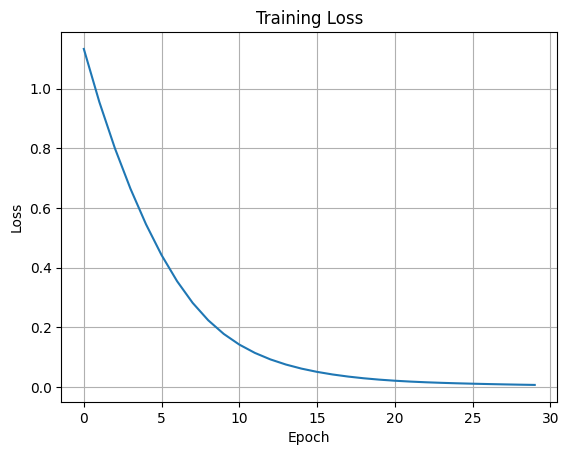

In [215]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()